In [1]:
#Continuous form of period doubling from Meister 1998 paper
# modified by David
# Update: 2020-10-30
#This code use faster method: inner product rather than loop

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
import math
%matplotlib inline

In [3]:
#Gain control function
def gain(v):
    if v <0:
        print('廢物')
        return 1
    else:
        return 1/(1+(B*v)**4)

In [6]:
gain(0.1)

0.006619776582540339

In [5]:
# parameters
B = 35
tau = 0.058#ms
C = 1
order = 4
frequency = 25#Hz
frequency = 5#Hz

npts = 1000
dt = 0.002
nperiod = int((1/frequency)/dt)

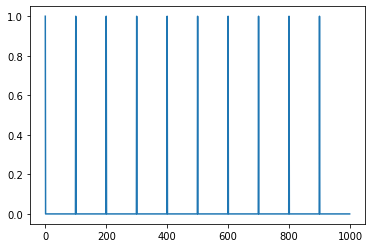

In [14]:
# generation of stimulations

s = np.zeros(npts)
for i in range(npts) :
    if i % nperiod ==0:
        s[i] = C
plt.plot(s)

Text(0.5, 1.0, 'temporal kernal of gain')

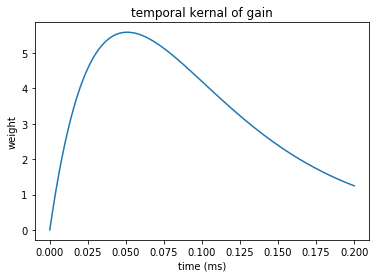

In [15]:
#Adaptation filter
tau_y = 0.0506
tau_z = 0.5769
gamma = 0.764
beta_c = -405
def Ky(t):
    return t*np.exp(-t/tau_y)/(tau_y**2)
def Kz(t):
    y = gamma*t*np.exp(-t/tau_y)/(tau_y**2)
    z = (1-gamma)*t*np.exp(-t/tau_z)/(tau_z**2)
    return y+z
length = 30
temp_Kz = Kz(np.arange(0,0.2+dt,dt))
plt.plot(np.arange(0,0.2+dt,dt),temp_Kz)
plt.xlabel('time (ms)')
plt.ylabel('weight')
plt.title('temporal kernal of gain')

In [21]:
# main loop
# use same symbols as in the paper

y = np.zeros(npts)
x = np.zeros(npts)
frequency = 10#Hz
tau =10/29

v = 0.0
for i in range(npts):
    y[i]= v
    x[i] = gain(v)*s[i]
    
# compute the convolution by integration here
# should be replaced by python code to be much faster; but no time to test
# David should try that
# also the 'dt' in the integration is missing because of the definition of B and C in the paper
    feedback_filter = np.exp(-np.arange(0,i)/frequency*tau)
    v = np.dot(x[0:i],feedback_filter[::-1])

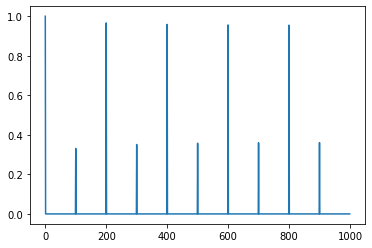

In [23]:
plt.plot(x)
#plt.plot(y)
#plt.ylim(0,0.2)

B is 0.07


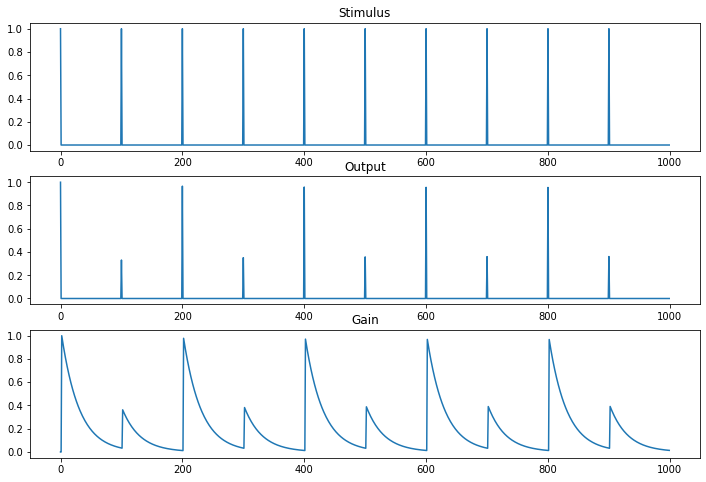

In [24]:
plt.subplot(311)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(312)
plt.plot(x)
plt.title('Output')
plt.subplot(313)
plt.plot(y)
plt.title('Gain')
plt.gcf().set_size_inches(12,8)
print('B is '+str(B*dt))
plt.savefig('pd.png')

Text(0.5, 1.0, 'Output')

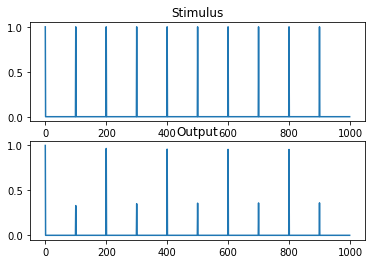

In [25]:
plt.subplot(211)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(212)
plt.plot(x)
plt.title('Output')
#plt.savefig('pd.png')

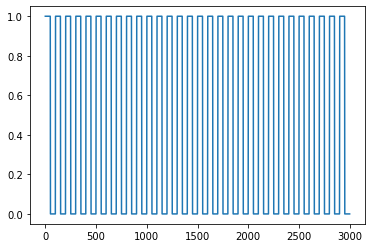

In [29]:
nstep = 3000
frequency = 5#Hz
nperiod = int((1/frequency)/dt)
# generation of stimulations
s = np.zeros(nstep)
for i in range(nstep):
    if i % nperiod ==0:
        s[i:i+int(nperiod/2)] = 1
#s = np.convolve(tp,s,'same')*dt
plt.plot(s)

In [30]:
# main loop
# use same symbols as in the paper

y = np.zeros(npts)
x = np.zeros(npts)
frequency = 10#Hz
tau =10/29

v = 0.0
for i in range(npts):
    y[i]= v
    x[i] = gain(v)*s[i]
    
# compute the convolution by integration here
# should be replaced by python code to be much faster; but no time to test
# David should try that
# also the 'dt' in the integration is missing because of the definition of B and C in the paper
    feedback_filter = np.exp(-np.arange(0,i)/frequency*tau)
    v = np.dot(x[0:i],feedback_filter[::-1])

Text(0.5, 1.0, 'Output')

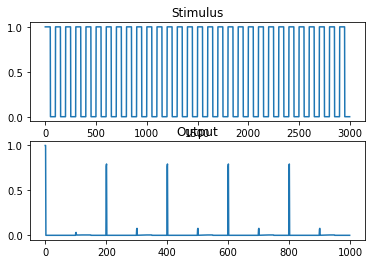

In [31]:
plt.subplot(211)
plt.plot(s)
plt.title('Stimulus')
plt.subplot(212)
plt.plot(x)
plt.title('Output')